# Homework 2
### House Prices: Advanced Regression Techniques [Kaggle Competition]
##### Erik Webb

What do you think of when you think of your dream home? 

The objective of this Kaggle competition (and assignment) is to create models to predict house prices. The training dataset contains 1460 observations and 80 features. Let's start by calling libraries and brining in the data.

In [42]:
# Core Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# ML Packages
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model

# Other Packages
import missingno as msno

In [2]:
train_location = "/Users/erikgregorywebb/Documents/Python/data/House-Prices-Advanced-Regression/train.csv"
test_location = "/Users/erikgregorywebb/Documents/Python/data/House-Prices-Advanced-Regression/test.csv"

train = pd.read_csv(train_location)
test = pd.read_csv(test_location)
target = train.SalePrice.values

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We'll tackle this task in three general steps: 
1. Data Cleaning 
2. Data Exploration & Visualization 
3. Model Fitting & Evaluation

### Data Cleaning

Before we start cleaning, let's develop a better understanding of what the data looks like.

In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

It looks like we have information about almost every aspect of a home (and its surrounding property) you could imagine, from commonly cited measures like square-feet and number of bedrooms to more detailed  metrics like the height of the basement or the masonry veneer type. Note that the final column is 'SalePrice', which is the variable we seek to predict. 

Below is a categorization of the features within the following buckets: Sales, General, Location, Property, Interior, Basement, Utilities, Garage, and Exterior. This categorization is a subjective exercise, but it allowed me to become more familiar with the features and create general buckets within the dataset.  

**Sale**
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

**General**
- MSSubClass: The building class
- MSZoning: The general zoning classification
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: Dollar Value of miscellaneous feature

**Location**
- Street: Type of road access
- Alley: Type of alley access
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- LotFrontage: Linear feet of street connected to property

**Property**
- LotArea: Lot size in square feet
- LotShape: General shape of property
- LandContour: Flatness of the property
- LotConfig: Lot configuration
- LandSlope: Slope of property

**Interior**
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality

**Basement**
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms

**Utilities**
- Utilities: Type of utilities available
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system

**Garage**
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition

**Exterior**
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality

These features are a mix of continuous (Lot Area, Year Built, Bedrooms) and categorical (House Style, Roof Style, Garage Type) variables.  That distinction  has important implications for how we proceed with the data cleaning, processing, and visualization. We'll explore each of the features individually after we've cleaned the data.

The first step is to check for missing values. Since this dataset includes 80 features, I wouldn't be surprised to find that not all observations have a value for each feature. 

Below we find the number of missing values for each feature, for features with missing values. 

In [5]:
# Find the number of missing values for each feature, including only those greater than 0. 
missing_values = pd.DataFrame(train.isnull().sum())
missing_values = missing_values[(missing_values > 0).any(axis=1)]

# Sort the values in ascending order. 
missing_values = missing_values.sort_values(by = 0, ascending = False)
missing_values.columns = ['Number of Missing Values']
missing_values['Percent Missing'] = missing_values['Number of Missing Values']/len(train)
missing_values

,Number of Missing Values,Percent Missing
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


19 of the 80 features are missing 1 or more value. However, the degree to which values are missing varies widely across the 19 variables. Only 7 of 1460 properties have information about pool quality ('PoolQC') while only 1 property is missing information about the property's electrical system! I leveraged a packaged called [missingno]("https://github.com/ResidentMario/missingno") to better understand and help visualize the missing data. Due to the large number of features, I divided the data into two visuals:

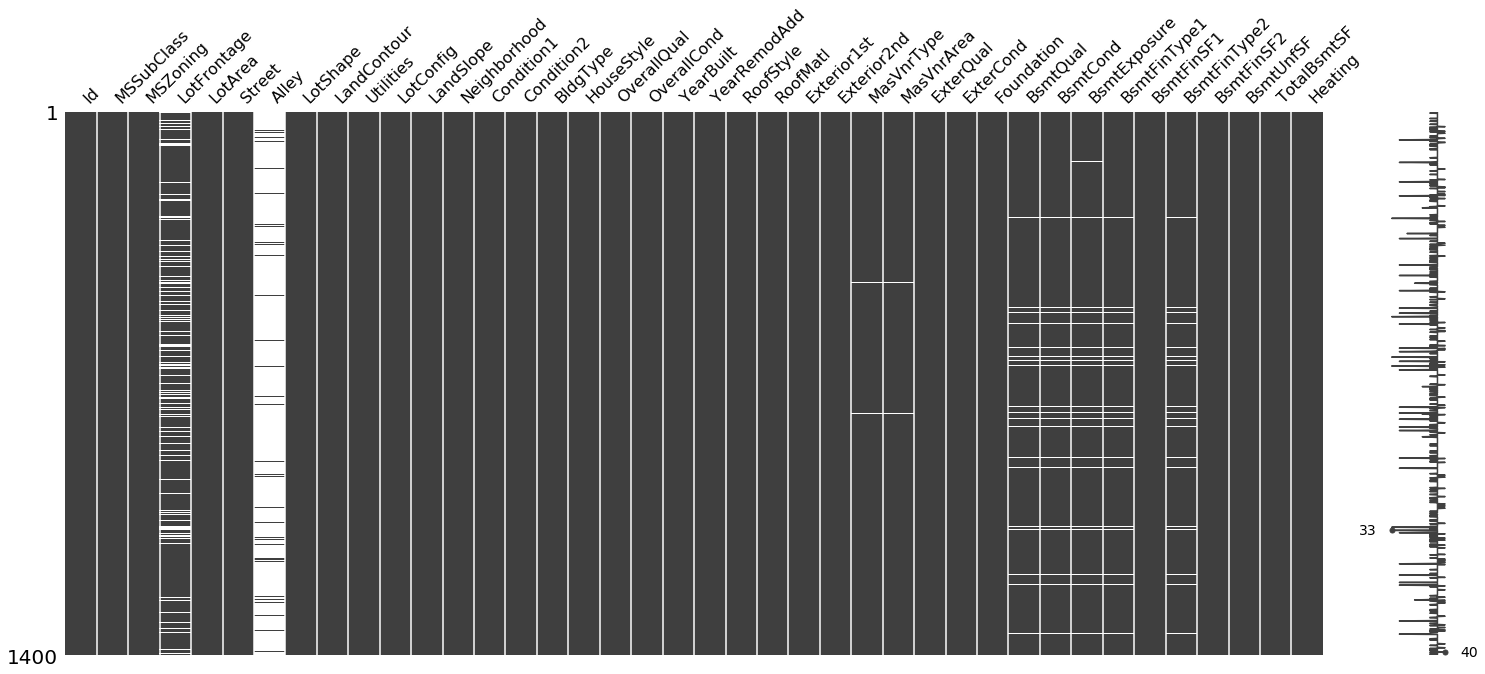

In [6]:
# First 41 Features
msno.matrix(train.iloc[:,0:40].sample(1400))

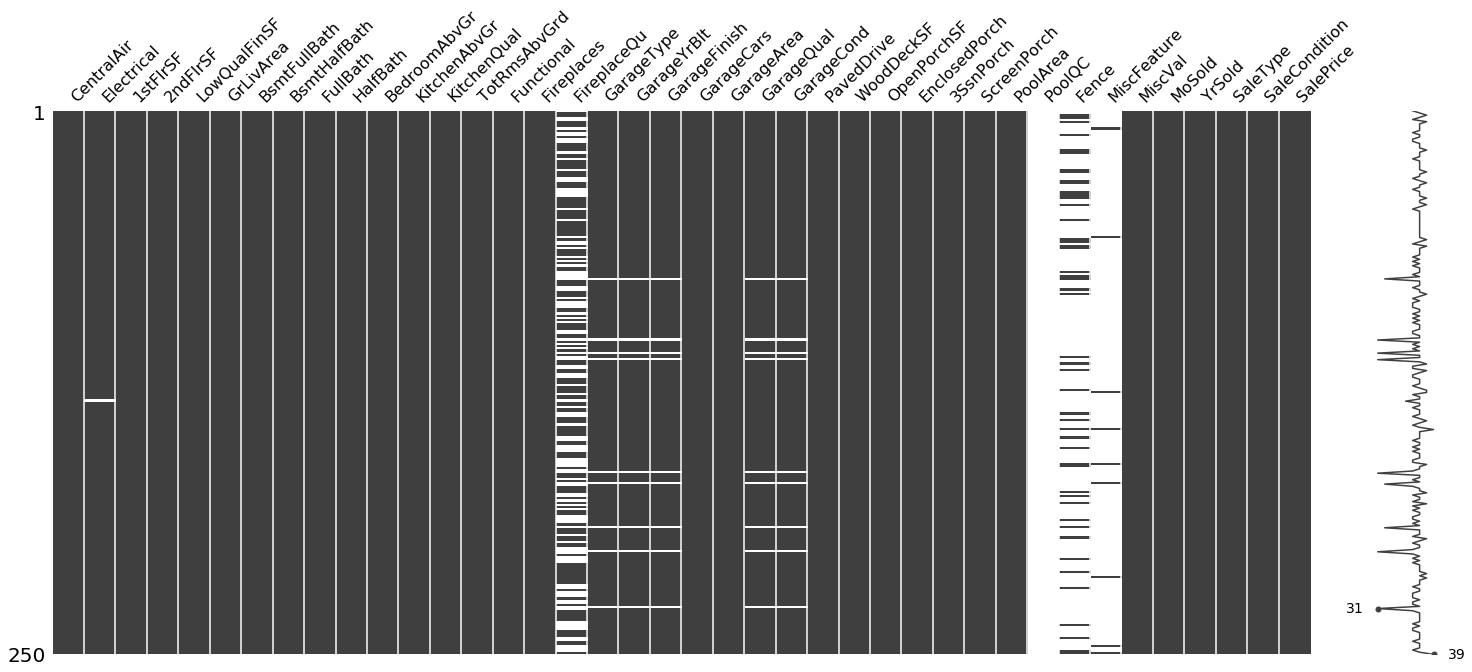

In [7]:
# Remaining Features
msno.matrix(train.iloc[:,41:81].sample(250))

One important step in examining missing data is determing if the values are missing at random or not missing at random. The heatmap function from the [missingno]("https://github.com/ResidentMario/missingno") package "measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another." In other words, it helps identity if how variables with missing values might be related.

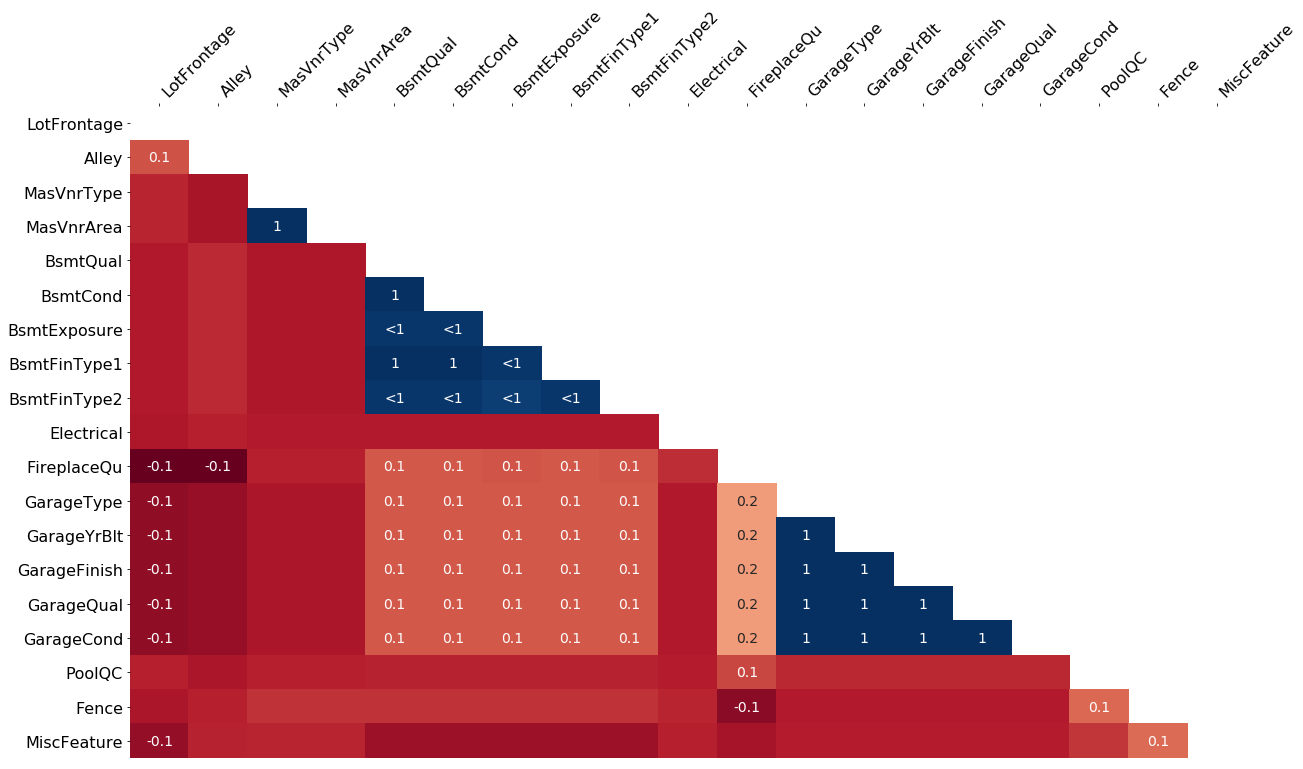

In [8]:
msno.heatmap(train)

In this case, it makes sense that the collection of variables that describe a property's basement or garage are missing together. If the home doesn't have a garage or basement, all of the related attributes will be blank. 

Let's address each of the features with missing values in order of severity (most observations missing). 

###### PoolQC

We'll start with 'PoolQC'. There are two variables that contain information about a home's pool: 'PoolArea' and 'PoolQC'. There are only 7 out of the 1460 properties (~.5%) that have a pool. Let's simplify and create a single pool dummy feature. This may come at the cost of not being able to differentiate between the value of pools with differing levels of quality when it comes time for prediction. 

In [9]:
print("PoolArea Unique Values: ", train['PoolArea'].unique(), "\nPoolQC Unique Values: ", train['PoolQC'].unique())

PoolArea Unique Values:  [  0 512 648 576 555 480 519 738] 
PoolQC Unique Values:  [nan 'Ex' 'Fa' 'Gd']


In [10]:
# Create a dummy variable for pool
train['Pool'] = np.where(train['PoolArea'] == 0, 0, 1)

# Drop the former pool variables
train = train.drop(['PoolArea', 'PoolQC'], 1)

###### MiscFeature	

There are 54 homes with special or miscellaneous features like a shed or second garage. Most of the time, the miscellaneous feature appears to be a shed. Let's address the missing values for this feature by simply replace the missing values with the word 'None'. 

In [11]:
train.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [12]:
# Fill in missing values with 'None'
train['MiscFeature'] = train['MiscFeature'].fillna(value = 'None')

###### Alley, Fence, and FireplaceQu

The alley, fence, and fireplace quality features are also categorical in nature, so we'll follow the same procedure, replacing empty values with the word 'None' (or 'Unknown') in order to preserve the information the features contains when dummy variables are created.

In [13]:
print("Alley Value Counts: \n", train.Alley.value_counts(), "\n\nFence Value Counts:\n", train.Fence.value_counts(), "\n\nFireplace Quality Value Counts:\n", train.FireplaceQu.value_counts())

Alley Value Counts: 
 Grvl    50
Pave    41
Name: Alley, dtype: int64 

Fence Value Counts:
 MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64 

Fireplace Quality Value Counts:
 Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64


In [14]:
# Fill in missing values with 'None'
train['Alley'] = train['Alley'].fillna(value = 'None')
train['Fence'] = train['Fence'].fillna(value = 'None')
train['FireplaceQu'] = train['FireplaceQu'].fillna(value = 'Unknown')

###### LotFrontage

LotFrontage is different from the previous features we've addressed with missing values because LotFrontage is a continuous feature. Even though I'd prefer to fill in the missing values of LotFrontage via model prediction, we'll take the easy route and fill in missing values with the average of LotFrontage, shown below as 70.049. This takes care of the 259 observations with a missing value for LotFrontage.

In [15]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
# Fill in missing values with the average
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())

###### Garage Features

There were five garage-related features each with 81 missing values. We'll interpret this to this mean that 81 homes don't have a garage. All five of the features expect for 'GarageYrBlt' are categorical, so we can simply replace the missing values with the word 'None'. It doesn't really make sense the replace 'GarageYrBlt' with the average year, but we'll do that now for the sake of simplicity.

In [17]:
# Fill in missing values with 'None'
train['GarageType'] = train['GarageType'].fillna(value = 'None')
train['GarageFinish'] = train['GarageFinish'].fillna(value = 'None')
train['GarageQual'] = train['GarageQual'].fillna(value = 'None')
train['GarageCond'] = train['GarageCond'].fillna(value = 'None')

# Fill in missing values with the average
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())

###### Basement Features

Much like the the set of garage features, there were five basement-related features with missing values. All five are categorical in nature, so we'll simply replace the missing values with the word 'Unknown'. I feel this is a better alternative than deleting these observations, even though it will create an extra dummy variable later on.

In [18]:
# Fill in missing values with 'None'
train['BsmtExposure'] = train['BsmtExposure'].fillna(value = 'Unknown')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(value = 'Unknown')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(value = 'Unknown')
train['BsmtCond'] = train['BsmtCond'].fillna(value = 'Unknown')
train['BsmtQual'] = train['BsmtQual'].fillna(value = 'Unknown')

###### Masonry Veneer Features

I initially had no idea what 'MasVnrArea' and 'MasVnrType' referred to but a quick [Google](https://www.carsondunlop.com/resources/articles/brick-houses-solid-masonry-vs-brick-veneer/) search fixed that. Veneer is a "thin decorative covering of fine wood applied to a coarser wood or other material." 'MasVnrType' already as a 'None' class, so we'll turn the 8 missing values for this feature into 'None' as well. 'MasVnrArea' is continuous so we'll simply inset the average values for the 8 missing values like we've previously done.

In [19]:
print("Masonry Veneer Type Value Counts:\n", train.MasVnrType.value_counts(), "\n\nMasonry Veneer Area Description:\n", train.MasVnrArea.describe())

Masonry Veneer Type Value Counts:
 None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64 

Masonry Veneer Area Description:
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


In [20]:
# Fill in missing values with 'None'
train['MasVnrType'] = train['MasVnrType'].fillna(value = 'None')

# Fill in missing values with the average
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

###### Electrical Feature

Finally, there was one missing value for the 'Electrical' feature. We'll turn it into the class 'None'.

In [21]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
train['Electrical'] = train['Electrical'].fillna(value = 'None')

We've now taken care of all the missing data! Whew, that was quite a bit of work, but it was well worth it. We'll now address outliers, create dummies, and transform some variables before moving onto visualization and modeling.

### Address Outliers

To complete the data cleaning and processing, we now create dummy variables for all of the categorical variables in our dataset. We'll save these in a new data frame so that we can use the version without the dummy variables for the visualizations. 

In [23]:
train_final = pd.get_dummies(train)
train_final = train_final.astype(float)
target = train_final['SalePrice']

In [24]:
train_final.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
#train_final.to_csv('train_final.csv', sep=',')

In [26]:
# Clean the test data
test['Pool'] = np.where(test['PoolArea'] == 0, 0, 1)
test = test.drop(['PoolArea', 'PoolQC'], 1)
test['MiscFeature'] = test['MiscFeature'].fillna(value = 'None')
test['Alley'] = test['Alley'].fillna(value = 'None')
test['Fence'] = test['Fence'].fillna(value = 'None')
test['FireplaceQu'] = test['FireplaceQu'].fillna(value = 'Unknown')
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['GarageType'] = test['GarageType'].fillna(value = 'None')
test['GarageFinish'] = test['GarageFinish'].fillna(value = 'None')
test['GarageQual'] = test['GarageQual'].fillna(value = 'None')
test['GarageCond'] = test['GarageCond'].fillna(value = 'None')
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['BsmtExposure'] = test['BsmtExposure'].fillna(value = 'Unknown')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(value = 'Unknown')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(value = 'Unknown')
test['BsmtCond'] = test['BsmtCond'].fillna(value = 'Unknown')
test['BsmtQual'] = test['BsmtQual'].fillna(value = 'Unknown')
test['MasVnrType'] = test['MasVnrType'].fillna(value = 'None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test_final = pd.get_dummies(test)
test_final = test_final.astype(float)
test_final = test_final.fillna(0)

In [27]:
#null_matrix = test_final[test_final.isnull().any(axis=1)]
#null_matrix.to_csv('null_matrix.csv', sep=',')

### Explore the Data

In [28]:
feat_name = train.columns[1]
train[feat_name].unique()
train[feat_name].dtype

for feature in train.columns:
    print(feature, "\n", train[feature].dtype)
    if train[feature].dtype == "object":
        print(train[feature].unique(), "\n")
    else:
        #sns.distplot(train[feature].values);
        print(train[feature].describe(), "\n")

Id 
 int64
count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64 

MSSubClass 
 int64
count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64 

MSZoning 
 object
['RL' 'RM' 'C (all)' 'FV' 'RH'] 

LotFrontage 
 float64
count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64 

LotArea 
 int64
count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 

Street 
 object
['Pave' 'Grvl'] 

Alley 
 object
['None' 'Grvl

In [29]:
#sns.lmplot(x = "YearBuilt", y = "SalePrice", data = train)

In [30]:
#order = sorted(train.MSZoning.unique())
#sns.boxplot(x="MSZoning", y="SalePrice", order = order, data=train)

In [31]:
#order = sorted(train.RoofStyle.unique())
#sns.boxplot(x="RoofStyle", y="SalePrice", order = order, data=train)

### Model the Data

In [32]:
# Scale the data
scaler = StandardScaler()
scaler.fit(train_final)
scaled_df = scaler.transform(train_final)

In [33]:
# Fit the model
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(scaled_df, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 540968.3221986842


In [34]:
# Fit the model
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(test_final, target)
predictions = linear_regression_model.predict(scaled_df)
mse = mean_squared_error(target, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

ValueError: Found input variables with inconsistent numbers of samples: [1459, 1460]

In [ ]:
# Make predictions with test data
scaler = StandardScaler()
scaler.fit(test_final)
scaled_test_df = scaler.transform(test_final)
predictions_final = linear_regression_model.predict(scaled_test_df)

In [ ]:
print("Test: ", test_final.shape, "\t", "Train: ", train_final.shape)

In [ ]:
target.shape

In [ ]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [43]:
# Split the data into training/testing sets
X_train = train_final.loc[:, train_final.columns != 'SalePrice']
X_test = test_final.loc[:, test_final.columns != 'SalePrice']

# Split the targets into training/testing sets
Y_train = train_final['SalePrice']

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_test)

ValueError: shapes (1459,282) and (300,) not aligned: 282 (dim 1) != 300 (dim 0)